In [1]:
import pandas as pd
from xgboost import XGBClassifier, cv
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import numpy as np

SEED=0

# Load the dataset
- Load data from excel sheet
- Set X (independent variables) and y (dependent variables) 

In [2]:
data_path = './data/mayhew1.csv'
na_values=['na']
df = pd.read_csv(data_path)
# smiles =  np.loadtxt("./data/smiles.txt", dtype='str')
y=df['odor.class'] # labels, independent variables
y = y.replace(['Odor'], True)
y = y.replace(['Odorless'], False)
assigned = df['dataset.assigned']
df = df.drop(['odor.class.source', 'dataset.assigned', 'odor.class', 
              'transport.ML.odor.probability', 'many.feature.ML.odor.probability'], axis=1)
df = df.set_index('SMILES')
X = df
df

,boiling.point.experimental,boiling.point.estimate.EPISuite,boiling.point.estimate.Banks,boiling.point.estimate.Burnop,boiling.point.best.available,vapor.pressure.experimental,vapor.pressure.best.available,MW,AMW,Sv,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
SMILES,,,,,,,,,,,,,,,,,,,,,
CC1=CC[C@H](CC1=O)C(=C)C,228.5,224.23,177.316328,211.376140,228.50,0.103000,0.103000,150.24,6.010,14.402,...,0,0,0,0,0,0,0,0,1,0
CC(=O)OC1CC(CC=C1C)C(=C)C,NaN,245.13,220.067558,267.379260,245.13,NaN,0.035300,194.30,6.072,18.171,...,0,0,0,0,1,0,1,0,1,0
CCC(=O)OC1CC(CC=C1C)C(=C)C,NaN,262.43,231.359855,283.769094,262.43,NaN,0.013900,208.33,5.952,19.698,...,0,0,1,0,1,0,1,0,1,0
CC1CC(C)(C)c2c(C1(C)C)cc(c(c2)C(=O)C)C,NaN,331.88,265.346589,354.216698,331.88,0.000512,0.000512,258.44,5.743,25.563,...,0,0,0,0,0,0,0,0,1,0
CC1=CCC(CC1)(O)C(C)C,209.0,211.85,181.799762,205.923187,209.00,NaN,0.042700,154.28,5.320,15.456,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC(=CCC(CO)C(=C)C)C,NaN,221.70,181.799762,195.317301,221.70,NaN,0.019500,154.28,5.320,15.456,...,0,0,0,0,0,0,0,0,1,0
CC1=CCC(CC1O)C(=C)C,228.0,230.02,179.574801,208.589955,228.00,NaN,0.013200,152.26,5.639,14.929,...,0,0,0,0,0,0,0,0,1,0
C=CC(=O)OCC1CCCO1,NaN,201.85,183.884293,99.383370,201.85,NaN,0.329000,156.20,6.791,13.305,...,0,0,0,0,0,0,0,0,0,0


# Split the dataset
- Split dataset into training and test set 
- Use equal proportions of odor/odorless class

In [3]:
assigned
train = assigned == 'train'
X_train_t = df.iloc[list(train[train].index)]
y_train_t = y.iloc[list(train[train].index)]
test = assigned == 'test'
X_test = df.iloc[list(test[test].index)]
y_test = y.iloc[list(test[test].index)]
val = assigned == 'validation'
X_val = df.iloc[list(val[val].index)]
y_val = y.iloc[list(val[val].index)]
X_train = X_train_t.append(X_val)
y_train = y_train_t.append(y_val)

print(f"Total number molecules in training set: {y_train.shape[0]}")
print(f"Odor: {y_train.value_counts()[True]}")
print(f"Odorless: {y_train.value_counts()[False]}")

print(f"\nTotal number molecules in test set: {y_test.shape[0]}")
print(f"Odor: {y_test.value_counts()[True]}")
print(f"Odorless: {y_test.value_counts()[False]}")

print(f"\nPercentage odorless {y_test.value_counts()[False]/y_test.shape[0]}")

Total number molecules in training set: 1894
Odor: 1595
Odorless: 299

Total number molecules in test set: 30
Odor: 20
Odorless: 10

Percentage odorless 0.3333333333333333


### Validation set

In [4]:
print("Number of training samples:", len(X_train_t))
print("Number of validation samples:", len(X_val))

Number of training samples: 1864
Number of validation samples: 30


# Test Model 

In [5]:
def test_model(model, y_test, X_test, verbose=True):
    y_pred=model.predict(X_test)
    y_pred_probs=model.predict_proba(X_test)[:,1]
    
    if verbose:
        print("ROC_AUC (TEST):",metrics.roc_auc_score(y_test, y_pred_probs))
        print("\n\nCLASSIFICATION REPORT:\n",metrics.classification_report(y_test, y_pred))
        
        if hasattr(model, 'feature_importances_') and hasattr(X_test, 'columns'):
            feature_imp = pd.Series(model.feature_importances_,index=X_test.columns.values).sort_values(ascending=False)
            top_20 = feature_imp.nlargest(20)
            sns.barplot(x=top_20, y=top_20.index)
            plt.xlabel('Descriptor Importance Score')
            plt.ylabel('Descriptor')
            plt.title("Top descriptors")
            plt.show()
        
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probs)  
        
        #create ROC curve
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
    return metrics.roc_auc_score(y_test, y_pred_probs) 

def test_model_cross_val(model, y_test, X_test, k=5, verbose=True):
    roc_auc_nans = cross_val_score(model, X_test, y_test, cv=k, scoring='roc_auc')
    print(f"AVERAGE CV={k} ROC_AUC (TEST): {np.mean(roc_auc_nans)}")
    print(f"AVERAGE CV={k} STD (TEST): {np.std(roc_auc_nans)}")

# Handle Non Important Descriptors 

1. Remove values below threshold e.g. 0, any descriptors with 0 importance
2. Get the top N descriptors

In [6]:
def handle_importance(model, X_train, X_test=pd.DataFrame(), threshold=-1, n=-1, verbose=None):
    feature_imp = pd.Series(model.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
    if threshold >= 0:
        feature_imp = feature_imp[feature_imp > threshold]
    
    if n >= 0: 
        feature_imp = feature_imp.nlargest(n)
        
    if verbose: 
        print(feature_imp)
        
    X_train = X_train.loc[:, feature_imp.axes[0].tolist()]
    
    if not X_test.empty:
        X_test = X_test.loc[:, feature_imp.axes[0].tolist()]

    return X_train, X_test, model 

In [7]:
def optimiseImportance(model, X_tr, y_tr, k=5, verbose=True):
    
    imp_params = [
              {"threshold":-1, 'n':5}, 
              {"threshold":-1, 'n':10}, 
              {"threshold":-1, 'n':25}, 
              {"threshold":-1, 'n':50},
              {"threshold":-1, 'n':100}, 
              {"threshold":-1, 'n':200}, 
              {"threshold":-1, 'n':400}, 
              {"threshold":-1, 'n':800},
              {"threshold":-1, 'n':X_tr.shape[1]}]

    print(f"Cross validated importance experiment with k={k}")
    
    imp_df = pd.DataFrame(columns=['Most important N descriptors', 'Average ROC_AUC', 'Standard Deviation'])

    for imp_param in imp_params: 
        name = (f"Threshold:{imp_param['threshold']}N:{imp_param['n']}".replace("N:-1", '')).replace("Threshold:-1", '')
        
        if verbose:
            print(name)
        
        X_tr_temp , _, _ = handle_importance(model, 
                                            X_tr.copy(), 
                                            threshold=imp_param['threshold'], 
                                            n=imp_param['n'])
                
        roc_auc_nans = cross_val_score(model, X_tr_temp, y_tr, cv=k, scoring='roc_auc')
        
        imp_df = imp_df.append({'Most important N descriptors': imp_param['n'], 
                               'Average ROC_AUC':np.mean(roc_auc_nans), 
                               'Standard Deviation':np.std(roc_auc_nans)}, 
                                ignore_index = True)

    if verbose:
        fig = imp_df.plot(kind="bar", x="Most important N descriptors", y="Average ROC_AUC", yerr="Standard Deviation", title=f"ROC_AUC after filtering descriptors by importance CV={k}", legend=False)
        
        plt.ylim(0.85,1)
        
    return imp_df

# Handle NaNs


- You cannot have any missing values in the random forest model, you can in XGB
- You cannot have mismatched features between columns in the random forest model
- 3 options 
    1. Remove any columns with missing values 
    2. Remove columns above threshold percentange NaNs e.g. 60% NaNs. 
    3. Remove columns above threshold percentange NaNs e.g. 60% NaNs. Replace columns below threshold with missing values with the mean value.

In [8]:
def handleNaNs(X_tr, X_te, option=1, thresh=0.6): 
    if option == 1:
        nans =  X.columns[X.isna().any()].tolist()
        X_tr.drop(nans, inplace = True, axis=1)
        X_te.drop(nans, inplace = True, axis=1)
    else: 
        nans = X.isna().mean(axis=0)
        # set threshold for percentage nans before we drop 
        X_thresh = nans[nans >= thresh]
        X_tr.drop(X_thresh.index, 
          axis=1, 
          inplace=True)
        X_te.drop(X_thresh.index, 
          axis=1, 
          inplace=True)
        
        if option == 3: 
            X_tr.fillna(X_train.mean(), inplace=True) 
            X_te.fillna(X_test.mean(), inplace=True)
    
    return X_tr, X_te

In [9]:
def optimiseNaNs(model, X_train, X_test, y_train, y_test, option=2, k=5, verbose=True): 
    print(f"Cross validated missing values experiment with k={k}")
    
    percentages = [x/100 for x in range(0, 100, 10)] 
    nans_df = pd.DataFrame(columns=['Name', 'Average ROC_AUC', 'Standard Deviation'])

    for perc in percentages: 
        name = str(perc)
        if perc == 0:
            X_train_cv, _  = handleNaNs(X_train.copy(), X_test.copy(), option=1)
        else:
            X_train_cv, _  = handleNaNs(X_train.copy(), X_test.copy(), option=option, thresh=perc)

        roc_auc_nans = cross_val_score(model, X_train_cv, y_train, cv=k, scoring='roc_auc')
        
        nans_df = nans_df.append({'Name': name, 
                                   'Average ROC_AUC':np.mean(roc_auc_nans), 
                                   'Standard Deviation':np.std(roc_auc_nans)}, 
                                    ignore_index = True)

    if verbose:
        fig = nans_df.plot(kind="bar", x="Name", y="Average ROC_AUC", yerr="Standard Deviation", title=f"ROC_AUC after thresholding descriptors by % NaNs CV={k}", legend=False)
        plt.ylim(0.90,0.98)
        
    return nans_df

# Random Forest Model

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [10]:
# set random state to 0 to allow reproducible results
clf=RandomForestClassifier(random_state=SEED, max_depth=3, n_estimators=100) 

# For readability
y_train_rf = y_train
y_test_rf = y_test
X_train_rf = X_train
X_test_rf = X_test

## Handle NaNs RF

Cross validated missing values experiment with k=5


,Name,Average ROC_AUC,Standard Deviation
0,0.0,0.902450,0.050628
1,0.1,0.903993,0.052319
2,0.2,0.901437,0.054351
3,0.3,0.901437,0.054351
4,0.4,0.900189,0.050908
5,0.5,0.902813,0.053531
6,0.6,0.902813,0.053531
7,0.7,0.902813,0.053531
8,0.8,0.902813,0.053531
9,0.9,0.902813,0.053531


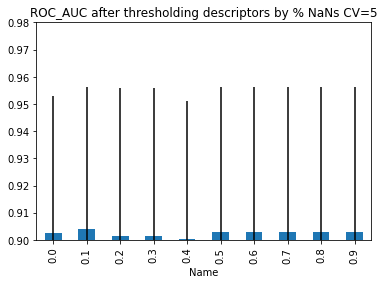

In [11]:
# choose optimal threshold for removing columns with NaNs
optimiseNaNs(clf, X_train_rf, X_test_rf, y_train_rf, y_test_rf, option=3)

let's just go with removing all the columns with missing values

In [12]:
X_train_rf, X_test_rf = handleNaNs(X_train.copy(), X_test.copy(), option=1)

In [13]:
clf.fit(X_train_rf, y_train_rf)
print("Validation performance of Random Forest after removing all columns with NaNs")
test_model_cross_val(clf, y_train_rf, X_train_rf, k=5, verbose=True)

Validation performance of Random Forest after removing all columns with NaNs
AVERAGE CV=5 ROC_AUC (TEST): 0.9024498344048315
AVERAGE CV=5 STD (TEST): 0.05062806997701148


## Using Importance to reduce dimensionality

Cross validated importance experiment with k=5
N:5
N:10
N:25
N:50
N:100
N:200
N:400
N:800
N:4866


,Most important N descriptors,Average ROC_AUC,Standard Deviation
0,5.0,0.902590,0.056843
1,10.0,0.911033,0.055775
2,25.0,0.906298,0.056652
3,50.0,0.911444,0.055161
4,100.0,0.914429,0.053057
5,200.0,0.913259,0.053282
6,400.0,0.911940,0.052151
7,800.0,0.910938,0.050665
8,4866.0,0.904170,0.048201


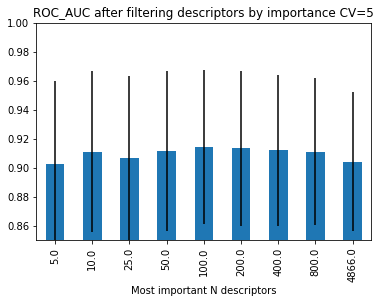

In [14]:
clf.fit(X_train_rf, y_train_rf)
optimiseImportance(clf, X_train_rf, y_train_rf)

### Remove labels 

In [15]:
clf.fit(X_train_rf, y_train_rf)
X_train_rf, X_test_rf, clf = handle_importance(clf, 
                                               X_train_rf, 
                                               X_test_rf, 
                                               threshold=-1, 
                                               n=200)

In [16]:
clf.fit(X_train_rf, y_train_rf)
print("Performance of Random Forest after removing labels")
test_model_cross_val(clf, y_train_rf, X_train_rf, k=5, verbose=True)

Performance of Random Forest after removing labels
AVERAGE CV=5 ROC_AUC (TEST): 0.9132586826771514
AVERAGE CV=5 STD (TEST): 0.05328218056738981


In [17]:
X_train_rf

,SM2_B.s.,boiling.point.best.available,TPSA.NO.,SpMax3_Bh.s.,SpAbs_B.s.,vapor.pressure.best.available,P_VSA_p_2,HyWi_B.s.,SM4_B.s.,RTs,...,EE_Dz.e.,Eig04_EA,SpPos_Dz.e.,P_VSA_s_5,X3Av,SM11_AEA.ed.,AVS_G,RTe.,GATS4s,ALOGP2
SMILES,,,,,,,,,,,,,,,,,,,,,
CCC(=O)OC1CC(CC=C1C)C(=C)C,4.972,262.43,26.30,4.529,36.049,1.390000e-02,36.145,4.481,8.350,51.476,...,45.318,1.414,45.318,0.000,0.130,20.480,155.726,0.107,1.269,11.880
CC1=CCC(CC1)(O)C(C)C,4.517,209.00,20.23,4.130,25.181,4.270000e-02,42.683,4.046,7.648,46.460,...,25.780,1.000,25.780,0.000,0.157,22.038,107.734,0.204,1.551,6.503
CC1=CC[C@](CC1)(O)C(C)C,4.517,209.00,20.23,4.130,25.181,4.270000e-02,42.683,4.046,7.648,46.452,...,25.780,1.000,25.780,0.000,0.157,22.038,107.732,0.204,1.551,6.503
O=C1C2(C)CCC(C1(C)C)C2,4.647,193.00,17.07,3.975,26.169,8.170000e-01,25.145,4.153,8.164,48.600,...,22.161,0.704,22.161,0.000,0.134,23.068,89.186,0.115,2.084,5.556
OCC1=CC[C@H](CC1)C(=C)C,4.583,244.00,20.23,4.320,25.847,4.780000e-03,42.683,4.102,7.733,45.413,...,27.145,1.000,27.145,0.000,0.150,19.826,97.707,0.177,0.947,5.818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1=CC(=CC=C1N)S(=O)(=O)N,5.233,341.95,86.18,5.108,36.527,7.320000e-06,108.502,4.697,8.890,83.852,...,19.941,1.000,19.941,0.000,0.134,21.610,67.849,0.279,1.151,0.008
CCCCCCCCN[C@@H]([C@H](c1ccc(cc1)SC(C)C)O)C,5.071,422.62,32.26,4.323,48.018,1.780000e-08,60.694,4.618,7.975,58.565,...,129.372,1.892,129.372,18.011,0.164,20.564,439.242,0.113,1.481,31.991
C/C(=C\C)/C(=O)O,4.799,185.00,37.30,4.359,23.246,1.330000e-01,67.828,4.270,8.495,56.390,...,10.725,-1.000,10.725,0.000,0.128,19.192,42.241,0.366,1.744,1.733


ROC_AUC (TEST): 0.9550000000000001


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       1.00      0.80      0.89        10
        True       0.91      1.00      0.95        20

    accuracy                           0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30



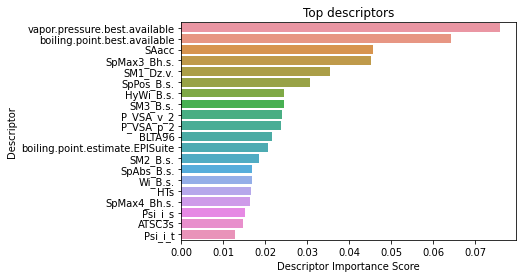

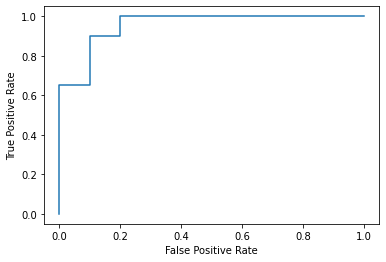

0.9550000000000001

In [18]:
tuned_rf = clf
clf.fit(X_train_rf, y_train_rf)
test_model(clf, y_test_rf, X_test_rf)

# XgBoost

https://practicaldatascience.co.uk/machine-learning/how-to-create-a-classification-model-using-xgboost

In [19]:
# for readibility 
y_train_xgb = y_train
y_test_xgb = y_test
X_train_xgb = X_train
X_test_xgb = X_test

## Create model

In [20]:
X_train_xgb.columns = X_train_xgb.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))
X_test_xgb.columns = X_test_xgb.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

xgb = XGBClassifier(random_state=SEED, learning_rate=0.1, n_estimators=100)
xgb.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [21]:
# Baseline results
print("Baseline performance of XGBoost")
test_model_cross_val(xgb, y_train_xgb, X_train_xgb, k=5, verbose=True)

Baseline performance of XGBoost
AVERAGE CV=5 ROC_AUC (TEST): 0.9343107875954164
AVERAGE CV=5 STD (TEST): 0.04114937121576065


## Handle NaNs

Cross validated missing values experiment with k=5


,Name,Average ROC_AUC,Standard Deviation
0,0.0,0.932925,0.042539
1,0.1,0.933677,0.041271
2,0.2,0.934294,0.041431
3,0.3,0.934294,0.041431
4,0.4,0.933021,0.041715
5,0.5,0.934311,0.041149
6,0.6,0.934311,0.041149
7,0.7,0.934311,0.041149
8,0.8,0.934311,0.041149
9,0.9,0.934311,0.041149


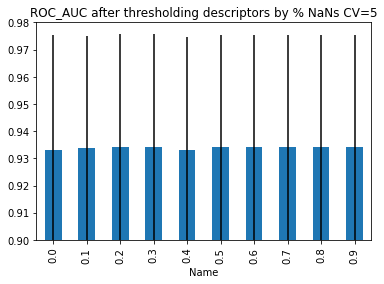

In [22]:
# choose optimal threshold for removing columns with NaNs
optimiseNaNs(xgb, X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb, option=2)

Choose to remove columns with NaNs > 0.7

In [23]:
X_train_xgb, X_test_xgb = handleNaNs(X_train_xgb.copy(), X_test_xgb.copy(), option=1)

In [24]:
xgb.fit(X_train_xgb, y_train_xgb)
test_model_cross_val(xgb, y_train_xgb, X_train_xgb, k=5, verbose=True)

AVERAGE CV=5 ROC_AUC (TEST): 0.9329245700724368
AVERAGE CV=5 STD (TEST): 0.04253919396542942


## Importance Experiment XGB

In [ ]:
optimiseImportance(xgb, X_train_xgb, y_train_xgb)

Cross validated importance experiment with k=5
N:5
N:10
N:25
N:50


In [ ]:
X_train_xgb, X_test_xgb, xgb = handle_importance(xgb, 
                                                X_train_xgb, 
                                                X_test_xgb, 
                                                threshold=-1, 
                                                n=100)

# Filted importance results
xgb.fit(X_train_xgb, y_train_xgb)
test_model_cross_val(xgb, y_train_xgb, X_train_xgb, k=5, verbose=True)

In [ ]:
tuned_xgb = xgb

In [ ]:
tuned_xgb.fit(X_train_xgb, y_train_xgb)
test_model(tuned_xgb, y_test_xgb, X_test_xgb)